In [1]:
from copy import deepcopy
from graphviz import Digraph
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Node:

  def __init__(self, state, action = None, parent = None):
    self.state = state
    self.id = str(self)
    self.action = action
    self.parent = parent

  def __str__(self):
    result = ''
    for i in range(3):
      for j in range(3):
        result += str((self.state[i][j]))
      result += '\n'
    return result.replace('0', '_')

  def get_blank_pos(self, state):
    for i in range(3):
      for j in range(3):
        if state[i][j] == 0:
          return i, j

  def get_dst_pos(self, action, pi, pj):
    if action == 'L':
      pj += 1
    elif action == 'R':
      pj -= 1
    elif action == 'U':
      pi +=1
    elif action == 'D':
      pi -= 1
    return pi, pj

  def get_succ_by(self, state, action):
    pi_blank, pj_blank = self.get_blank_pos(state)
    pi_dst, pj_dst = self.get_dst_pos(action, pi_blank, pj_blank)

    if (pi_dst >= 0 and pi_dst < 3) and (pj_dst >= 0 and pj_dst < 3):
      if action == 'L':
        state[pi_dst][pj_dst - 1] = state[pi_dst][pj_dst]
      elif action == 'R':
        state[pi_dst][pj_dst + 1] = state[pi_dst][pj_dst]
      elif action == 'U':
        state[pi_dst - 1][pj_dst] = state[pi_dst][pj_dst]
      elif action == 'D':
        state[pi_dst + 1][pj_dst] = state[pi_dst][pj_dst]
      state[pi_dst][pj_dst] = 0
      return state
    return None

  def get_successors(self):
    result = []
    for action in ['L', 'R', 'U', 'D']:
      succ = self.get_succ_by(deepcopy(self.state), action)
      if succ != None:
        result.append(Node(succ, action, self))
    return result

  def get_parent(self):
    return self.parent

  def get_state(self):
    return self.state

  def get_id(self):
    return self.id

  def get_str(self):
    return str(self)

  def get_action(self):
    return self.action

  def get_heuristics(self):
    distance_goal_1 = 0
    distance_goal_2 = 0
    for i in range(3):
      for j in range(3):
        if self.state[i][j] != 0:
          x_goal_1, y_goal_1 = divmod(self.state[i][j] - 1, 3)
          distance_goal_1 += abs(i - x_goal_1) + abs(j - y_goal_1)

          x_goal_2, y_goal_2 = divmod(self.state[i][j], 3)
          distance_goal_2 += abs(i - x_goal_2) + abs(j - y_goal_2)
    if distance_goal_1 <= distance_goal_2:
      return distance_goal_1
    return distance_goal_2

  def draw(self, dot):
    dot.node(self.get_id(), self.get_str())
    if self.parent != None:
      dot.edge(self.parent.get_id(), self.get_id(), self.get_action())

In [3]:
class SearchStrategy:

  def get_path(self, dst): # dst is passed as reference value
    path = [dst]
    while path[0].get_parent() != None:
      path.insert(0, path[0].get_parent())
    return path

  def get_solution(self, dst): # dst is passed as reference value
    path = self.get_path(dst)

    dot = Digraph()
    path[0].draw(dot)

    actions = []

    for i in range(1, len(path)):
      action = path[i].get_action()
      if action == 'L':
        actions.append('Left')
      elif action == 'R':
        actions.append('Right')
      if action == 'U':
        actions.append('Up')
      if action == 'D':
        actions.append('Down')
      path[i].draw(dot)

    return actions, dot

  def check_goal(self, node): # node is passed as reference value
    goal = ['123\n456\n78_\n', '_12\n345\n678\n']
    if str(node) in goal:
      return True
    return False

  def search(self, src):
    dot = Digraph()
    expanded = []
    frontier = []
    actions = []
    total_cost = []
    return actions, total_cost, dot

  def __str__(self):
    return 'Executing Search Strategy'

In [4]:
class BFS(SearchStrategy):

  def search(self, src): # src is passed as 2D array
    root = Node(src)

    expanded = [] # a list stores string value of Node instance
    frontier = [] # a queue stores reference value of Node instance

    frontier.append(root)
    while frontier:
      node = frontier.pop(0)

      expanded.append(str(node))

      successors = node.get_successors() # successors is a list composed of Node instances
      for succ in successors:
        if str(succ) not in expanded:
          if self.check_goal(succ):
            actions, dot = self.get_solution(succ)
            total_cost = len(expanded)
            return actions, total_cost, dot
          frontier.append(succ)
    return None, None, None

  def __str__(self):
    return 'Executing BFS'

In [5]:
class AStar(SearchStrategy):

  def search(self, src):
    root = Node(src)

    expanded = [] # a list stores string value of Node instance
    frontier = [] # a priority queue stores reference value of Node instance

    frontier.append((root, 0, root.get_heuristics()))
    while frontier:
      frontier.sort(key=lambda f: f[2])
      node, g, f = frontier.pop(0)
      if self.check_goal(node):
        actions, dot = self.get_solution(node)
        total_cost = len(expanded)
        return actions, total_cost, dot
      if str(node) in expanded:
        continue
      expanded.append(str(node))

      successors = node.get_successors() # successors is a list composed of Node instances
      for succ in successors:
        if str(succ) not in expanded:
          g_succ = g + 1
          frontier.append((succ, g_succ, g_succ + succ.get_heuristics()))
    return None, None, None

  def __str__(self):
    return 'Executing AStar'

In [6]:
class EightPuzzle:

  def solve(self, init_state, search_name): # init_state is passed as 2D array
    if search_name == 'BFS':
      bfs = BFS()
      actions, total_cost, dot = bfs.search(init_state)
      return actions, total_cost, dot
    elif search_name == 'AStar':
      astar = AStar()
      actions, total_cost, dot = astar.search(init_state)
      return actions, total_cost, dot

Executing AStar
List of actions = ['Left', 'Left', 'Up']
Number of actions to reach goal = 3
Total cost = 3


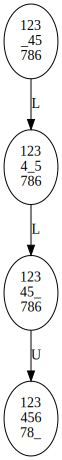

In [7]:
# init_state = [[1, 2, 3], [0, 4, 5], [7, 8, 6]]
# ep = EightPuzzle()
# actions, total_cost, dot = ep.solve(init_state, 'BFS')
# print('Executing BFS')
# print('List of actions =', actions)
# print('Number of actions to reach goal =', len(actions))
# print('Total cost =', total_cost)
# dot

init_state = [[1, 2, 3], [0, 4, 5], [7, 8, 6]]
ep = EightPuzzle()
actions, total_cost, dot = ep.solve(init_state, 'AStar')
print('Executing AStar')
print('List of actions =', actions)
print('Number of actions to reach goal =', len(actions))
print('Total cost =', total_cost)
dot

In [8]:
def random_state(src, n):
  root = Node(src)
  expanded = []
  frontier = []
  rand_state = []

  frontier.append(root)
  while True:
    if len(rand_state) >= n:
      return rand_state[0: n]

    node = frontier.pop(0)
    expanded.append(str(node))

    successors = node.get_successors()
    for succ in successors:
      if str(succ) not in expanded:
        succ_state = succ.get_state()
        if succ_state not in rand_state:
          rand_state.append(succ_state)
        frontier.append(succ)

start_state1 = [[1, 2, 3],[4, 5, 6],[7, 8, 0]]
start_state2 = [[0, 1, 2], [3, 4, 5],[6, 7, 8]]

random_state1 = random_state(start_state1, 500)
random_state2 = random_state(start_state2, 500)

rand_state = random_state1 + random_state2 # List of 1000 random state

In [9]:
# BFS measuring
total_cost_bfs = []
running_time_bfs = []

ep = EightPuzzle()
for ele in rand_state:

    start_time_bfs = time.time()
    actions, total_cost, dot = ep.solve(ele, 'BFS')
    end_time_bfs = time.time()

    running_time_bfs.append((end_time_bfs - start_time_bfs) * 1000)

    total_cost_bfs.append(total_cost)

avg_cost_bfs = sum(total_cost_bfs) // 1000
total_running_time_bfs = sum(running_time_bfs)

# print(running_time_bfs)
# print(total_cost_bfs)
# print(len(running_time_bfs))
# print(len(total_cost_bfs))
print('Evaluate BFS performance as looking solution for 1000 random states')
print('Total running time in miliseconds =', total_running_time_bfs)
print('Average total path cost =', avg_cost_bfs)

Evaluate BFS performance as looking solution for 1000 random states
Total running time in miliseconds = 17291.450262069702
Average total path cost = 182


In [10]:
# AStar measuring
total_cost_astar = []
running_time_astar = []

ep = EightPuzzle()
for ele in rand_state:

    start_time_astar = time.time()
    actions, total_cost, dot = ep.solve(ele, 'AStar')
    end_time_astar = time.time()

    running_time_astar.append((end_time_astar - start_time_astar) * 1000)

    total_cost_astar.append(total_cost)

avg_cost_astar = sum(total_cost_astar) // 1000
total_running_time_astar = sum(running_time_astar)

#print(running_time_astar)
# print(total_cost_astar)
# print(len(running_time_astar))
# print(len(total_cost_astar))
print('Evaluate AStar performance as looking solution for 1000 random states')
print('Total running time in miliseconds =', total_running_time_astar)
print('Average total path cost =', avg_cost_astar)

Evaluate AStar performance as looking solution for 1000 random states
Total running time in miliseconds = 2146.162271499634
Average total path cost = 11


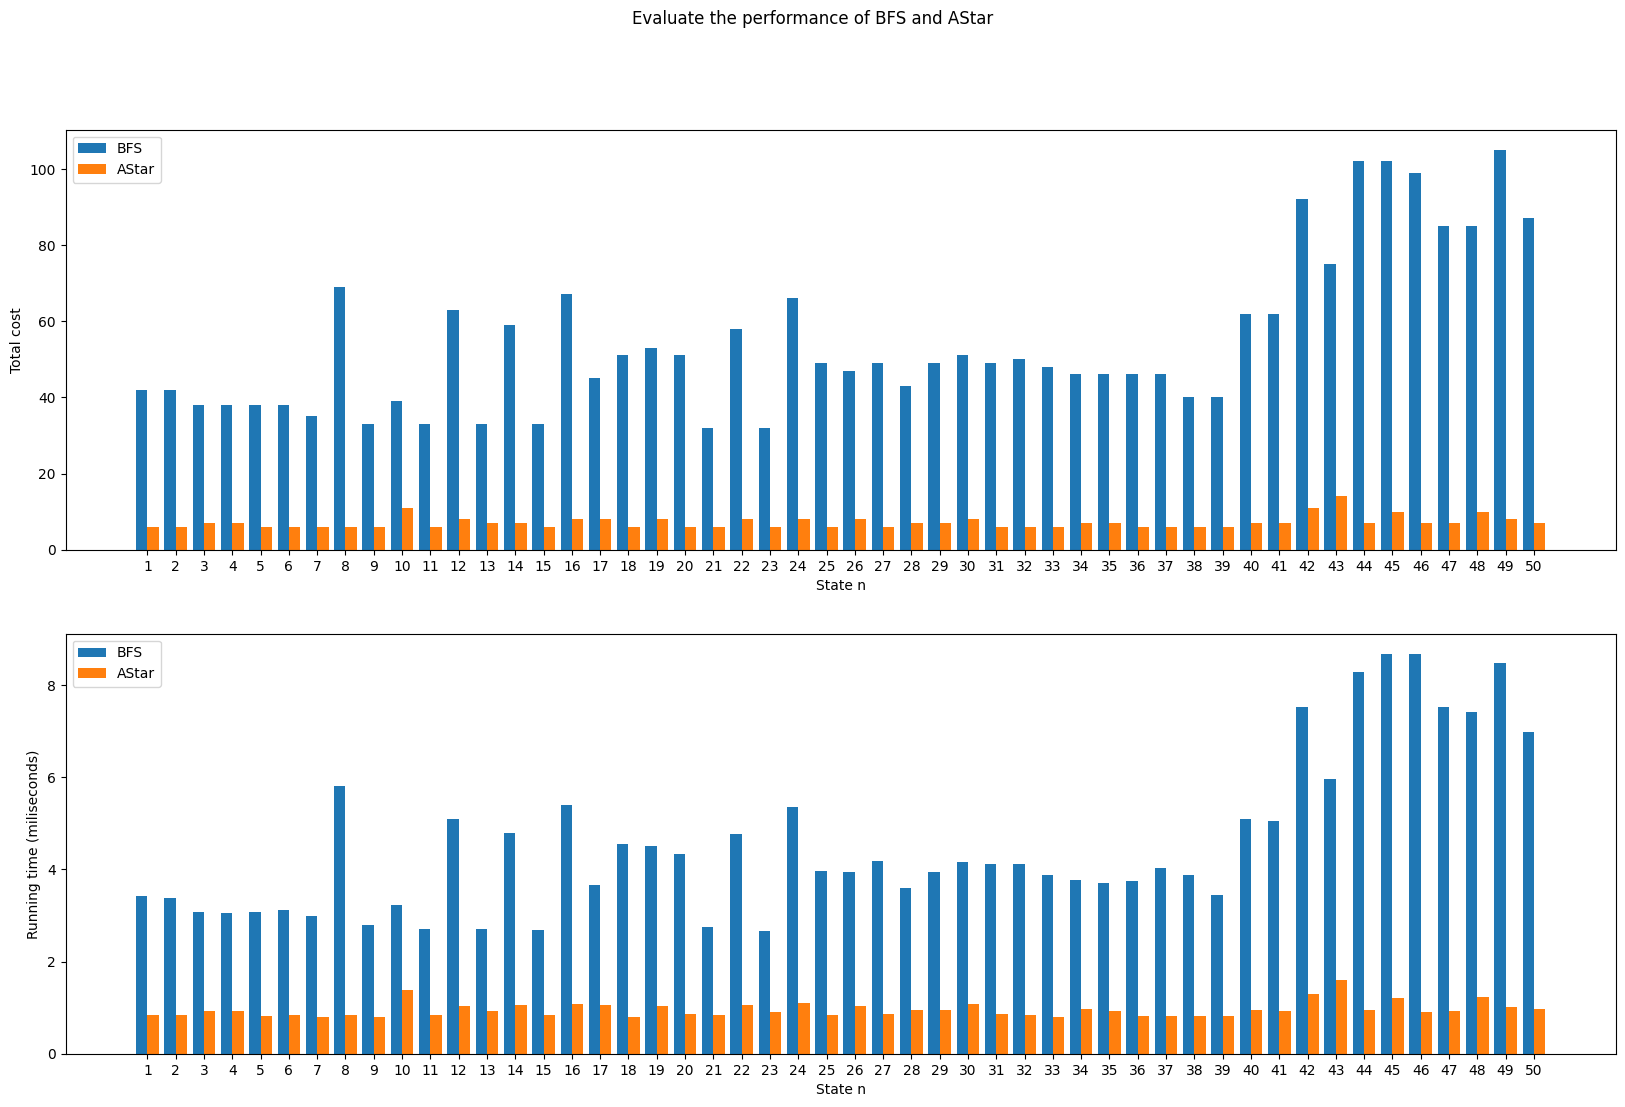

In [11]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 12))

n_total_cost_bfs = total_cost_bfs[50: 100]
n_total_cost_astar = total_cost_astar[50: 100]

x1_axis = np.arange(1, len(n_total_cost_bfs) + 1)

ax1.bar(x1_axis - 0.2, n_total_cost_bfs, 0.4, label='BFS')
ax1.bar(x1_axis + 0.2, n_total_cost_astar, 0.4, label='AStar')

n = [i for i in range(1, len(n_total_cost_bfs) + 1)]
ax1.set_xticks(n)

ax1.set_xlabel('State n')
ax1.set_ylabel('Total cost')
ax1.legend(loc='upper left')

n_running_time_bfs = running_time_bfs[50: 100]
n_running_time_astar = running_time_astar[50: 100]

x2_axis = np.arange(1, len(n_running_time_bfs) + 1)

ax2.bar(x2_axis - 0.2, n_running_time_bfs, 0.4, label='BFS')
ax2.bar(x2_axis + 0.2, n_running_time_astar, 0.4, label='AStar')

n = [i for i in range(1, len(n_running_time_bfs) + 1)]
ax2.set_xticks(n)

ax2.set_xlabel('State n')
ax2.set_ylabel('Running time (miliseconds)')
ax2.legend(loc='upper left')
fig.suptitle('Evaluate the performance of BFS and AStar ')

fig.show()